In [1]:
import pandas as pd
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers 
import PIL.Image as Image
%matplotlib inline

In [2]:
Animaldir = "raw-img" #Image local directories
Test_Animal_dir = 'raw2-img'

In [3]:
batch_size = 32 #Imports image from local directory at our prefered size
img_height = 192
img_width = 192
img_size = (192,192)

train_animals = tf.keras.utils.image_dataset_from_directory(
  Animaldir,
  validation_split=0.2,
  label_mode='int',
  labels = 'inferred',
  class_names = None,
  color_mode = 'rgb',
  subset="training",
  shuffle = True,
  seed = 123,
  image_size=img_size,
  batch_size=batch_size)

val_animals = tf.keras.utils.image_dataset_from_directory(
  Animaldir,
  validation_split=0.2,
  label_mode='int',
  labels = 'inferred',
  class_names = None,
  color_mode = 'rgb',
  shuffle = True,
  seed = 123,
  subset="validation",
  image_size=img_size,
  batch_size=batch_size)

Found 18686 files belonging to 10 classes.
Using 14949 files for training.
Found 18686 files belonging to 10 classes.
Using 3737 files for validation.


In [4]:
class_names = np.array(train_animals.class_names) #Gets the array of class names

In [5]:
data_augmentation = keras.Sequential( #Data Augmentation 1
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
  ]
)

In [6]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import MaxPooling2D, BatchNormalization

num_classes = len(class_names)
base_model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),  
  layers.Dense(10)
])

base_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 192, 192, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 192, 192, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 4)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 10)                368650    
                                                                 
Total params: 368,762
Trainable params: 368,762
Non-trainable params: 0
________________________________________________

In [7]:
result_base = base_model.fit(train_animals, 
                    epochs=10,
                    validation_data=val_animals)

Epoch 1/10
468/468 [==============================] - 43s 91ms/step - loss: 2.0479 - accuracy: 0.3077 - val_loss: 1.8165 - val_accuracy: 0.3602
Epoch 2/10
468/468 [==============================] - 34s 73ms/step - loss: 1.4216 - accuracy: 0.5265 - val_loss: 1.8296 - val_accuracy: 0.3781
Epoch 3/10
468/468 [==============================] - 34s 73ms/step - loss: 1.0276 - accuracy: 0.6751 - val_loss: 1.9308 - val_accuracy: 0.3918
Epoch 4/10
468/468 [==============================] - 35s 73ms/step - loss: 0.7161 - accuracy: 0.7906 - val_loss: 2.2228 - val_accuracy: 0.3730
Epoch 5/10
468/468 [==============================] - 34s 73ms/step - loss: 0.4764 - accuracy: 0.8742 - val_loss: 2.3972 - val_accuracy: 0.3797
Epoch 6/10
468/468 [==============================] - 37s 79ms/step - loss: 0.3064 - accuracy: 0.9319 - val_loss: 2.6672 - val_accuracy: 0.3674
Epoch 7/10
468/468 [==============================] - 37s 80ms/step - loss: 0.1966 - accuracy: 0.9658 - val_loss: 3.0332 - val_accuracy:

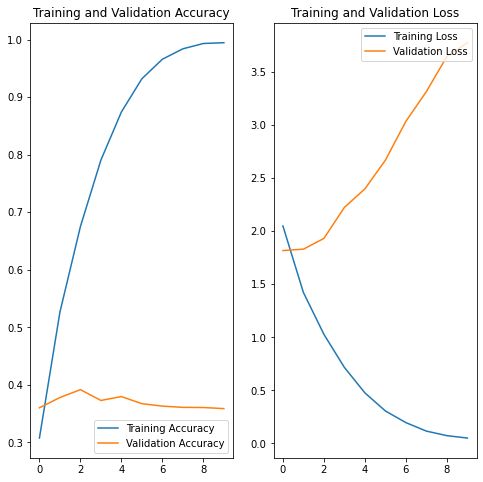

In [8]:
acc = result_base.history['accuracy']
val_acc = result_base.history['val_accuracy']

loss = result_base.history['loss']
val_loss = result_base.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()